In [1]:
# 1. Import the required libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
# 2. Define linguistic variables (inputs and output)
temperature = ctrl.Antecedent(np.arange(15, 41, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')

In [3]:
# 3. Membership functions 
# For temperature
temperature['low'] = fuzz.trimf(temperature.universe, [15, 15, 25])
temperature['medium'] = fuzz.trimf(temperature.universe, [20, 25, 30])
temperature['high'] = fuzz.trimf(temperature.universe, [25, 40, 40])

# For humidity
humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 50])
humidity['medium'] = fuzz.trimf(humidity.universe, [25, 50, 75])
humidity['high'] = fuzz.trimf(humidity.universe, [50, 100, 100])

# For the speed of the fan
fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [25, 50, 75])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [50, 100, 100])

In [4]:
# 4. Define fuzzy rules
rule1 = ctrl.Rule(temperature['high'] & humidity['high'], fan_speed['high'])
rule2 = ctrl.Rule(temperature['medium'] & humidity['high'], fan_speed['medium'])
rule3 = ctrl.Rule(temperature['low'] & humidity['low'], fan_speed['low'])

In [5]:
# 5. Control system
fan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
fan_simulation = ctrl.ControlSystemSimulation(fan_ctrl) 

In [6]:
# 6. Input values and perform computation
# Input values
fan_simulation.input['temperature'] = 33  # Example temperature (°C)
fan_simulation.input['humidity'] = 73    # Example humidity (%)

# Perform computation
fan_simulation.compute()
fan_simulation.output

{'fan_speed': 80.1774891774891}

Fan Speed: 80.1774891774891


c:\Users\AE\AppData\Local\Programs\Python\Python310\lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


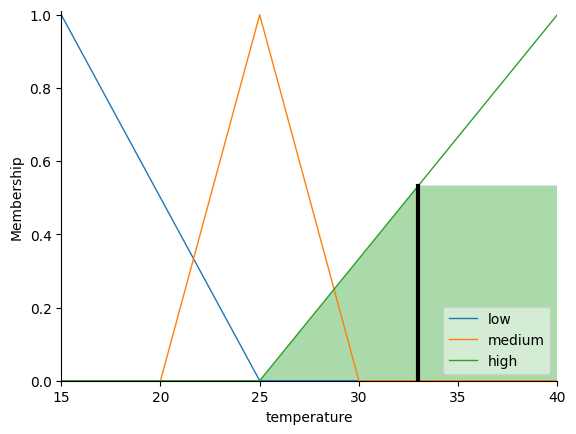

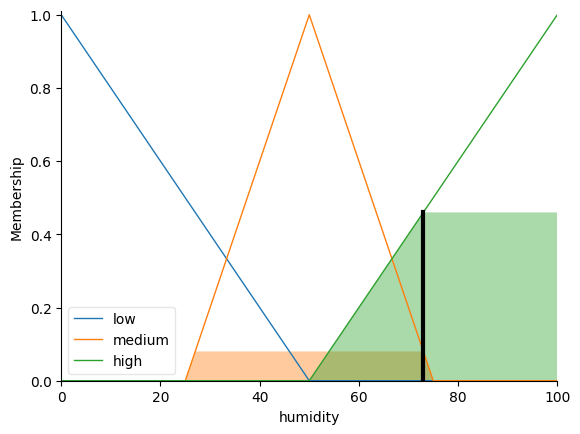

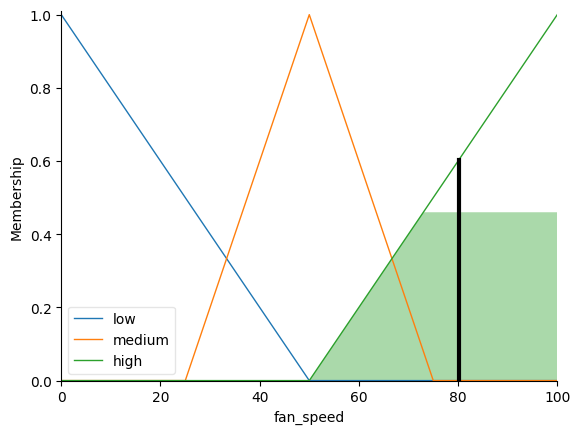

In [9]:
# Print the result
print(f"Fan Speed: {fan_simulation.output['fan_speed']}")

# Visualize the result
temperature.view(sim=fan_simulation)
humidity.view(sim=fan_simulation)
fan_speed.view(sim=fan_simulation)